# Load Data


In [1]:
import gdown
# URL of the file
url = 'https://drive.google.com/uc?id=1b_hy_SLK0WzaEcQmLiesyuJ9E4SzYa-r'

# Downloading the zip file
output = 'consumer_complaint_cleaned.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1b_hy_SLK0WzaEcQmLiesyuJ9E4SzYa-r
From (redirected): https://drive.google.com/uc?id=1b_hy_SLK0WzaEcQmLiesyuJ9E4SzYa-r&confirm=t&uuid=b0bb0ee2-fb46-4cfe-9255-980b30ac1d9a
To: /content/consumer_complaint_cleaned.zip
100%|██████████| 93.6M/93.6M [00:04<00:00, 19.3MB/s]


'consumer_complaint_cleaned.zip'

In [2]:
import zipfile
# Extracting the zip file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('consumer_complaint_cleaned')

In [2]:
import pandas as pd
import os
# Path to the CSV file
csv_file_path = os.path.join('consumer_complaint_cleaned', 'consumer_complaint_cleaned.csv')

# Loading the CSV file into a pandas DataFrame
consumer_complaint_cleaned = pd.read_csv(csv_file_path)

In [3]:
consumer_complaint_cleaned.head()


,Date Received,Product,Sub-Product,Issue,Sub-Issue,Consumer Complaint Narrative,Company Public Response,Company,State,Zip Code,...,Consumer Consent Provided?,Submitted Via,Date Sent To Company,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id,Year,Month,Week_Days
0,2016-12-29,Credit reporting,Sub Product not listed,Credit reporting company's investigation,No notice of investigation status/result,I disputed information on my Chexsystems repor...,Company Public Response not listed,"Fidelity National Information Services, Inc. (...",KY,42301,...,Consent provided,Web,2016-12-29,Closed with explanation,Yes,Yes,2268968,2016,December,Thursday
1,2015-07-10,Student loan,Non-federal student loan,Dealing with my lender or servicer,Trouble with how payments are handled,I have being paying my student loan ( {$500.00...,Company Public Response not listed,HEARTLAND PAYMENT SYSTEMS INC,IL,60659,...,Consent provided,Web,2015-07-21,Closed with explanation,Yes,No,1461598,2015,July,Friday
2,2017-02-14,Debt collection,Payday loan,Communication tactics,Frequent or repeated calls,Between XXXX and XXXX on XX/XX/2017 I have rec...,Company Public Response not listed,"ONEMAIN FINANCIAL HOLDINGS, LLC.",NJ,080XX,...,Consent provided,Web,2017-02-14,Closed with explanation,Yes,No,2343333,2017,February,Tuesday
3,2015-12-14,Credit reporting,Sub Product not listed,Incorrect information on credit report,Information is not mine,Complaint not listed,Company chooses not to provide a public response,Experian Information Solutions Inc.,CA,90020,...,data not listed,Phone,2015-12-16,Closed with explanation,Yes,No,1695201,2015,December,Monday
4,2014-08-14,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",Sub isuue not listed,Complaint not listed,Company Public Response not listed,JPMORGAN CHASE & CO.,CA,90076,...,data not listed,Phone,2014-08-18,Closed with explanation,Yes,No,985462,2014,August,Thursday


# Feature Engineering

In [4]:
# No required of Date type features for classification
consumer_complaint_cleaned= consumer_complaint_cleaned.drop(['Date Received','Date Sent To Company','Year','Month','Week_Days'], axis=1)

## Type of Features

In [5]:
# Numerical Features
num_features = [feature for feature in consumer_complaint_cleaned.columns if consumer_complaint_cleaned[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print(f'Column name is {num_features}')


Num of Numerical Features : 1
Column name is ['Complaint Id']


In [6]:
# 'Complaint Id'  it is a column of unique id of every customer it cannot help us in Classification
consumer_complaint_cleaned= consumer_complaint_cleaned.drop(['Complaint Id'], axis=1)

In [7]:
# 'Zip Code' it cannot help us in Classification
consumer_complaint_cleaned = consumer_complaint_cleaned.drop(['Zip Code'], axis=1)

In [8]:
# Categorical Features
cat_features = [feature for feature in consumer_complaint_cleaned.columns if consumer_complaint_cleaned[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(f'Column names are {cat_features}')

Num of Categorical Features : 14
Column names are ['Product', 'Sub-Product', 'Issue', 'Sub-Issue', 'Consumer Complaint Narrative', 'Company Public Response', 'Company', 'State', 'Tags', 'Consumer Consent Provided?', 'Submitted Via', 'Company Response To Consumer', 'Timely Response?', 'Consumer Disputed?']


In [9]:
consumer_complaint_cleaned.shape

(768316, 14)

In [10]:
# Randomly sample 50000 rows
sampled_consumer_complaint_cleaned = consumer_complaint_cleaned.sample(n=50000)

##  Split X and Y



*   Split Dataframe to X and y
*  Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the 'Consumer Disputed?' column.





In [11]:
X = sampled_consumer_complaint_cleaned.drop('Consumer Disputed?', axis=1)
y = sampled_consumer_complaint_cleaned['Consumer Disputed?']

In [12]:
y.value_counts()

Consumer Disputed?
No     40465
Yes     9535
Name: count, dtype: int64

## Feature Encoding and Scaling and Target column Encoding

In [13]:
# Importing Necessary Modules
import joblib
import numpy as np
import pandas as pd
from scipy.sparse import  load_npz
from scipy.sparse import hstack, save_npz, csr_matrix
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [14]:
# encoding Target Columns
lb = LabelBinarizer()
y = lb.fit_transform(y)
print(y.shape)

(50000, 1)


In [15]:
# Assign Columns for one hot encoding and for vectorisation
ohe_columns = ['Product', 'Sub-Product', 'Issue', 'Sub-Issue', 'Company Public Response', 'State', 'Tags', 'Consumer Consent Provided?', 'Submitted Via', 'Timely Response?', 'Company Response To Consumer']
string_columns = ['Consumer Complaint Narrative', 'Company']

In [16]:
# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe_columns),
        ('tfidf', TfidfVectorizer(), 'Consumer Complaint Narrative'),
        ('company_tfidf', TfidfVectorizer(), 'Company')
    ], n_jobs=-1)


# Fit and transform the data
X = preprocessor.fit_transform(X) # 35 sec
print(X.shape, type(X))

(50000, 22406) <class 'scipy.sparse._csr.csr_matrix'>


## Classification

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import tensorflow as tf
import numpy as np
import pandas as pd


In [18]:
# Define evaluation function
def evaluate_clf(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, f1, precision, recall, roc_auc


In [19]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}


In [20]:
def build_neural_network(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [21]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def evaluate_models(X, y, models, batch_size=512, epochs=5):
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models_list = []
    accuracy_list = []
    auc = []

    for name, model in models.items():
        model.fit(X_train, y_train)  # Train the model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(name)
        models_list.append(name)

        print('Model performance for Training set')
        print(f"- Accuracy: {model_train_accuracy:.4f}")
        print(f'- F1 score: {model_train_f1:.4f}')
        print(f'- Precision: {model_train_precision:.4f}')
        print(f'- Recall: {model_train_recall:.4f}')
        print(f'- Roc Auc Score: {model_train_rocauc_score:.4f}')
        print('----------------------------------')
        print('Model performance for Test set')
        print(f'- Accuracy: {model_test_accuracy:.4f}')
        accuracy_list.append(model_test_accuracy)
        print(f'- F1 score: {model_test_f1:.4f}')
        print(f'- Precision: {model_test_precision:.4f}')
        print(f'- Recall: {model_test_recall:.4f}')
        print(f'- Roc Auc Score: {model_test_rocauc_score:.4f}')
        auc.append(model_test_rocauc_score)
        print('=' * 35)
        print('\n')

    # Neural Network
    neural_net_model = build_neural_network(input_shape=(X_train.shape[1],))
    history = neural_net_model.fit(
        X_train, y_train, epochs=epochs,
        validation_data=(X_test, y_test), batch_size=batch_size, verbose=1
    )

    y_test_pred_nn = (neural_net_model.predict(X_test) > 0.5).astype("int32")
    model_test_accuracy, model_test_f1, model_test_precision, \
    model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred_nn)

    print("Neural Network")
    models_list.append("Neural Network")

    print('Model performance for Test set')
    print(f'- Accuracy: {model_test_accuracy:.4f}')
    accuracy_list.append(model_test_accuracy)
    print(f'- F1 score: {model_test_f1:.4f}')
    print(f'- Precision: {model_test_precision:.4f}')
    print(f'- Recall: {model_test_recall:.4f}')
    print(f'- Roc Auc Score: {model_test_rocauc_score:.4f}')
    auc.append(model_test_rocauc_score)
    print('=' * 35)
    print('\n')

    report = pd.DataFrame(list(zip(models_list, accuracy_list, auc)), columns=['Model Name', 'Accuracy', 'ROC AUC']).sort_values(by=['Accuracy'], ascending=False)
    return report

In [23]:
base_model_report = evaluate_models(X, y, models)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.8125
- F1 score: 0.0542
- Precision: 0.7934
- Recall: 0.0281
- Roc Auc Score: 0.5132
----------------------------------
Model performance for Test set
- Accuracy: 0.8116
- F1 score: 0.0218
- Precision: 0.4375
- Recall: 0.0112
- Roc Auc Score: 0.5039




<ipython-input-22-e4c23ae4bf51>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)  # Train the model


Random Forest
Model performance for Training set
- Accuracy: 0.9697
- F1 score: 0.9160
- Precision: 0.9742
- Recall: 0.8643
- Roc Auc Score: 0.9294
----------------------------------
Model performance for Test set
- Accuracy: 0.7987
- F1 score: 0.0770
- Precision: 0.2772
- Recall: 0.0447
- Roc Auc Score: 0.5089


Decision Tree
Model performance for Training set
- Accuracy: 0.9697
- F1 score: 0.9149
- Precision: 0.9894
- Recall: 0.8509
- Roc Auc Score: 0.9243
----------------------------------
Model performance for Test set
- Accuracy: 0.7285
- F1 score: 0.2031
- Precision: 0.2263
- Recall: 0.1842
- Roc Auc Score: 0.5193




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8104
- F1 score: 0.0189
- Precision: 1.0000
- Recall: 0.0095
- Roc Auc Score: 0.5048
----------------------------------
Model performance for Test set
- Accuracy: 0.8122
- F1 score: 0.0063
- Precision: 0.5000
- Recall: 0.0032
- Roc Auc Score: 0.5012


XGBClassifier
Model performance for Training set
- Accuracy: 0.8374
- F1 score: 0.2617
- Precision: 0.9991
- Recall: 0.1506
- Roc Auc Score: 0.5753
----------------------------------
Model performance for Test set
- Accuracy: 0.8070
- F1 score: 0.0282
- Precision: 0.2593
- Recall: 0.0149
- Roc Auc Score: 0.5025




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.8086
- F1 score: 0.0005
- Precision: 1.0000
- Recall: 0.0003
- Roc Auc Score: 0.5001
----------------------------------
Model performance for Test set
- Accuracy: 0.8122
- F1 score: 0.0000
- Precision: 0.0000
- Recall: 0.0000
- Roc Auc Score: 0.5000


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8095
- F1 score: 0.0243
- Precision: 0.6129
- Recall: 0.0124
- Roc Auc Score: 0.5053
----------------------------------
Model performance for Test set
- Accuracy: 0.8105
- F1 score: 0.0115
- Precision: 0.2821
- Recall: 0.0059
- Roc Auc Score: 0.5012


Epoch 1/5
79/79 [==============================] - 13s 95ms/step - loss: 0.5099 - accuracy: 0.8015 - val_loss: 0.4716 - val_accuracy: 0.8122
Epoch 2/5
79/79 [==============================] - 6s 79ms/step - loss: 0.4728 - accuracy: 0.8086 - val_loss: 0.4702 - val_accuracy: 0.8122
Epoch 3/5
79/79 [==============================] - 7s 81ms/step - loss:

In [24]:
base_model_report

,Model Name,Accuracy,ROC AUC
3,Gradient Boosting,0.8122,0.501228
5,Support Vector Classifier,0.8122,0.500000
0,Logistic Regression,0.8116,0.503929
6,AdaBoost Classifier,0.8105,0.501205
4,XGBClassifier,0.8070,0.502530
7,Neural Network,0.8040,0.512145
1,Random Forest,0.7987,0.508882
2,Decision Tree,0.7285,0.519292


## **Our Best model is  Gradient Boosting and its Accuracy is 81.22 percent.**

## Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# Train the Gradient Boosting model on the training data
best_model = GradientBoostingClassifier()
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Compute the classification report
class_report = classification_report(y_test, y_test_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[8116    6]
 [1871    7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8122
           1       0.54      0.00      0.01      1878

    accuracy                           0.81     10000
   macro avg       0.68      0.50      0.45     10000
weighted avg       0.76      0.81      0.73     10000



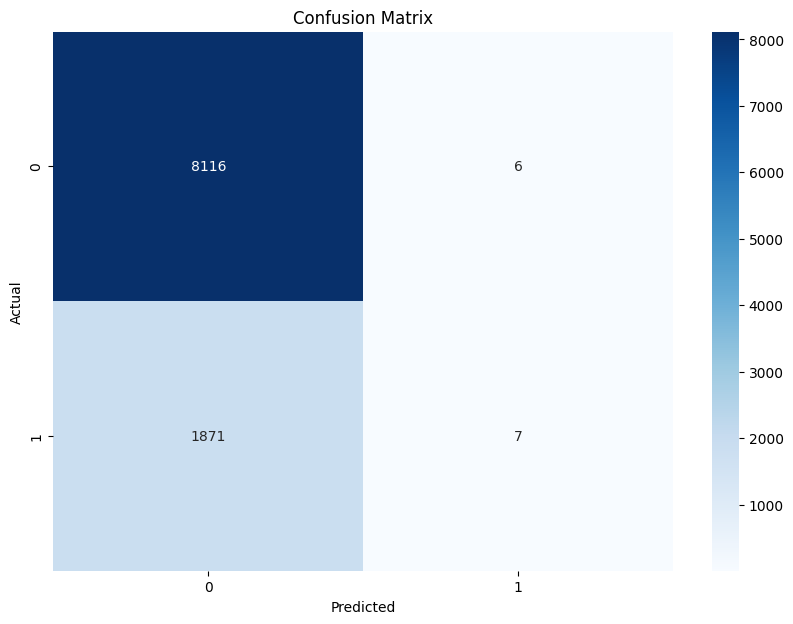

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()